In [2]:
import os
import re

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import cm 

import kaldi.hmm as hmm
from kaldi.util import io
from kaldi.gmm import am
import kaldi.matrix as matrix
from kaldi.fstext import SymbolTable, SymbolTableIterator

In [8]:
def plot_gmm(model_dir):
    # Load model
    with io.xopen(os.path.join(model_dir, 'final.mdl')) as ki:
        trans = hmm.TransitionModel().read(ki.stream(), ki.binary)
        acoustic = am.AmDiagGmm().read(ki.stream(), ki.binary)
        
    n_pdfs = acoustic.num_pdfs()
    n_gauss = acoustic.num_gauss()
    print(n_pdfs, n_gauss)
    
    # Load phones
    phones_sym_tbl = SymbolTable.read_text(os.path.join(model_dir, 'phones.txt'))
    phone_ids = {}
    for label, symbol in SymbolTableIterator(phones_sym_tbl):
        if 'eps' in symbol or 'SIL' in symbol or 'SPN' in symbol or '#' in symbol:
            continue

        phone = re.sub(r'[0-9]*_[BIES]', '', symbol)
        # print(phone, label)
        if phone not in phone_ids:
            phone_ids[phone] = []
        phone_ids[phone].append(label)

    # Load pdfs
    phone_pdf_ids = {phone : hmm.get_pdfs_for_phones(trans, ids)[1] for phone, ids in phone_ids.items()}
    phone_pdfs = {}
    for phone, pdfs in phone_pdf_ids.items():
        means = []
        variances = [matrix.Vector(acoustic.dim()) for _ in pdfs]

        for pdf_id in pdfs:
            for n in range(acoustic.num_gauss_in_pdf(pdf_id)):
                mean = matrix.Vector(acoustic.dim())
                acoustic.get_gaussian_mean(pdf_id, n, mean)
                means.append(mean.numpy())
        # print(phone, len(means))
        phone_pdfs[phone] = np.mean(np.stack(means), 0)
    
    # Plot
    PHONE_ORDER = ['P','B','M','F','V','TH','T','D','N','L','S','Z','CH','JH',
                   'SH','R','W','K','G','Y','HH','IY','IH','EY','EH','AE','ER','AH','AA',
                    'AY','AW','AO','OY','OW','UH','UW']
    phone_vec = np.zeros([acoustic.dim(), len(PHONE_ORDER)])
    for i, p in enumerate(PHONE_ORDER):
        phone_vec[:, i] = phone_pdfs[p]

    phone_vec = phone_vec - np.mean(phone_vec, axis=1, keepdims=True)
    phone_vec_norm = phone_vec.copy()
    for x in range(phone_vec_norm.shape[1]):
        phone_vec_norm[:,x] = phone_vec_norm[:,x]/np.linalg.norm(phone_vec_norm[:,x])
                  
    nConso = 21
    cMat = phone_vec_norm.T @ phone_vec_norm

    pMats = [cMat, cMat[0:nConso,0:nConso], cMat[nConso:, nConso:]]
    pLabels = [PHONE_ORDER, PHONE_ORDER[0:nConso], PHONE_ORDER[nConso:]]
    plotTitles = ['all','consonants','vowels']
    for pIdx in range(len(pMats)):
        cMat = pMats[pIdx]
        theseLabels = pLabels[pIdx]

        plt.figure(figsize=(10,10))
        plt.imshow(cMat,clim=[-1, 1],cmap='bwr_r')
        plt.gca().invert_yaxis()
        plt.xticks(ticks=np.arange(0,cMat.shape[0]), labels=theseLabels, rotation=45)
        plt.yticks(ticks=np.arange(0,cMat.shape[0]), labels=theseLabels)
        plt.title(plotTitles[pIdx])
        plt.colorbar()

127 999


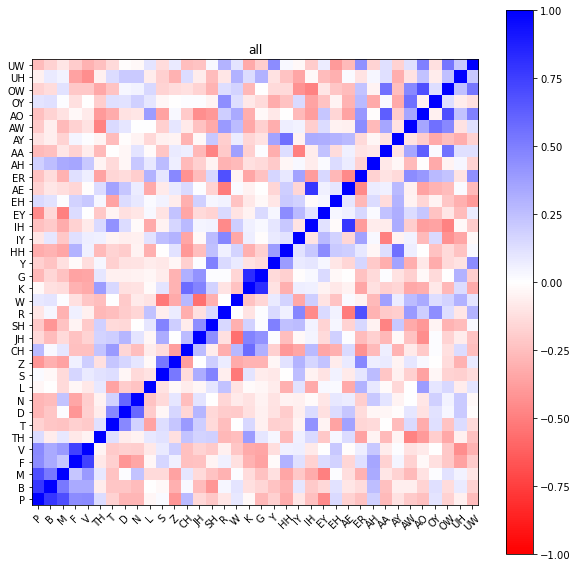

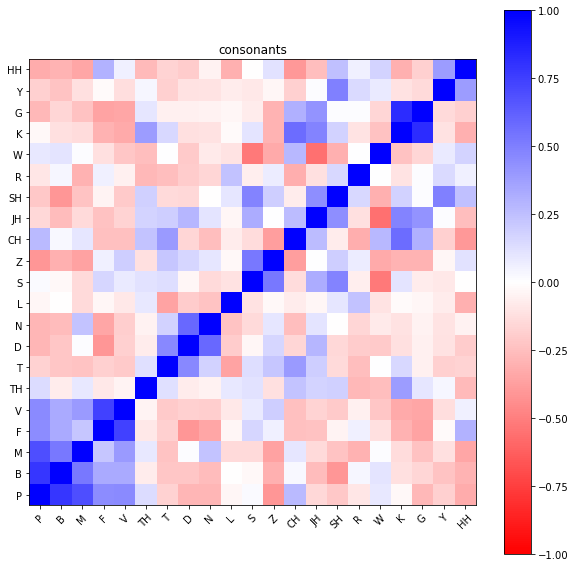

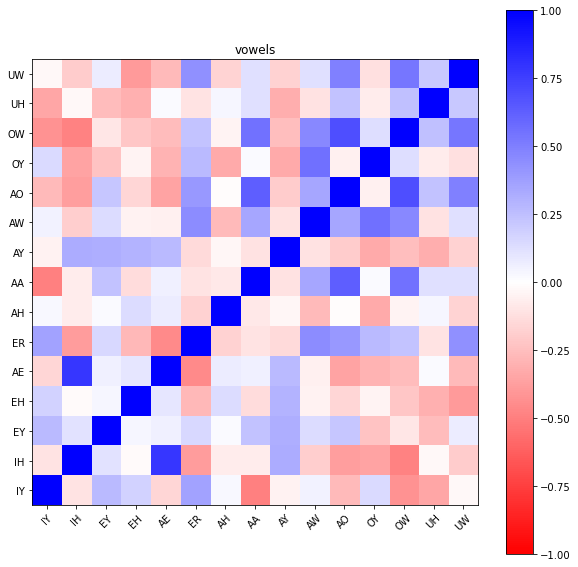

In [9]:
plot_gmm('models/mono')

1424 10026


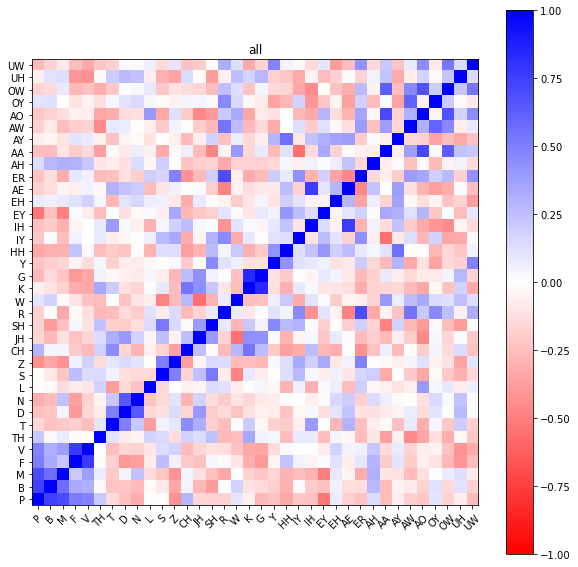

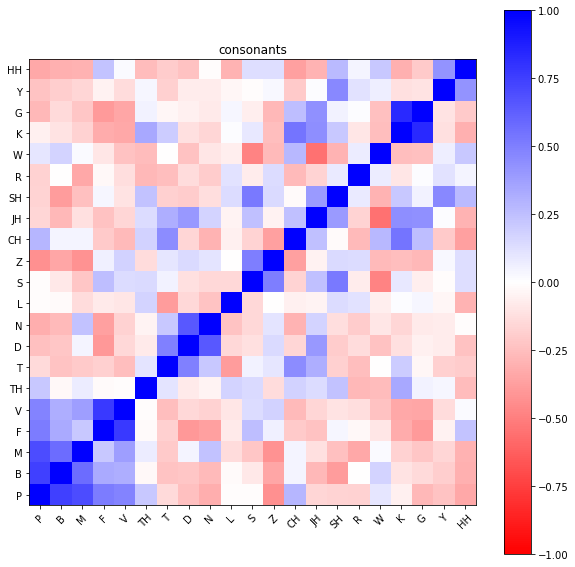

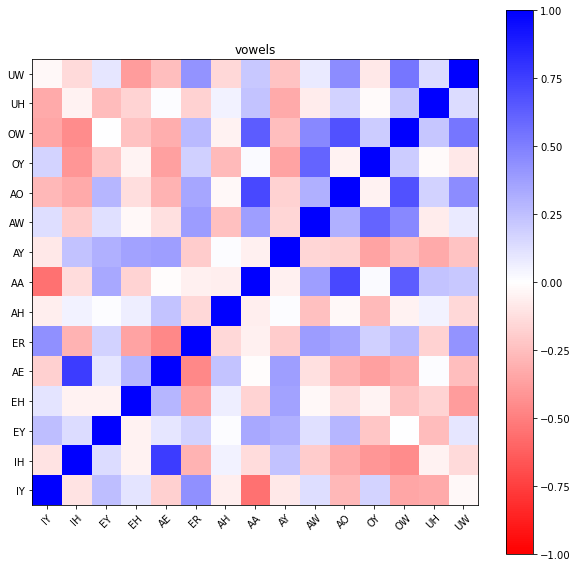

In [10]:
plot_gmm('models/tri')

In [59]:
dim = acoustic.dim()
n_pdfs = acoustic.num_pdfs()
n_gauss = acoustic.num_gauss()
print(n_pdfs, n_gauss)

for i in range(n_pdfs):
    print(i, acoustic.num_gauss_in_pdf(i))
# mean = matrix.Vector(dim)
# var = matrix.Vector(dim)

# acoustic.get_gaussian_mean(0, 0, mean)
# acoustic.get_gaussian_mean(0, 0, var)

# print(mean)
# print(var)

1424 10026
0 19
1 6
2 5
3 5
4 8
5 7
6 8
7 7
8 6
9 7
10 7
11 8
12 8
13 7
14 7
15 7
16 4
17 8
18 8
19 7
20 8
21 6
22 7
23 7
24 9
25 1
26 9
27 7
28 8
29 9
30 8
31 6
32 7
33 5
34 7
35 9
36 7
37 9
38 8
39 7
40 9
41 20
42 19
43 19
44 20
45 9
46 7
47 8
48 8
49 9
50 8
51 8
52 6
53 8
54 6
55 8
56 7
57 5
58 6
59 6
60 8
61 8
62 6
63 6
64 6
65 9
66 8
67 6
68 7
69 6
70 7
71 2
72 10
73 9
74 6
75 8
76 9
77 7
78 5
79 8
80 5
81 6
82 9
83 8
84 7
85 7
86 9
87 9
88 5
89 9
90 6
91 7
92 9
93 6
94 5
95 6
96 6
97 10
98 8
99 9
100 5
101 6
102 8
103 9
104 8
105 8
106 7
107 8
108 8
109 6
110 9
111 7
112 7
113 9
114 5
115 7
116 6
117 3
118 8
119 7
120 8
121 8
122 8
123 8
124 7
125 9
126 5
127 8
128 8
129 8
130 7
131 7
132 10
133 7
134 10
135 5
136 9
137 7
138 7
139 8
140 7
141 1
142 6
143 5
144 4
145 1
146 7
147 5
148 6
149 8
150 4
151 8
152 7
153 6
154 7
155 8
156 7
157 2
158 7
159 2
160 9
161 9
162 7
163 5
164 8
165 9
166 7
167 7
168 8
169 8
170 8
171 6
172 7
173 5
174 7
175 2
176 8
177 7
178 8
179 5
180 7
181 

In [60]:
hmm.get_pdfs_for_phones(trans, [11,12,13,14,26])

(False,
 [2,
  89,
  102,
  189,
  198,
  271,
  295,
  317,
  358,
  443,
  486,
  497,
  561,
  573,
  574,
  575,
  606,
  607,
  653,
  681,
  705,
  968,
  970,
  978,
  993,
  1140,
  1342])

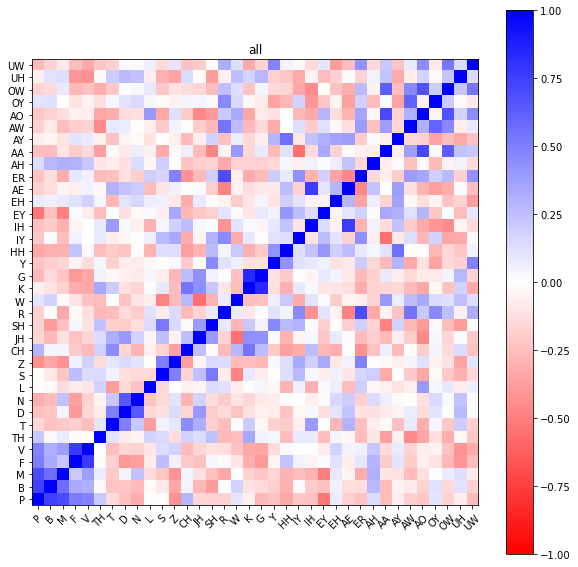

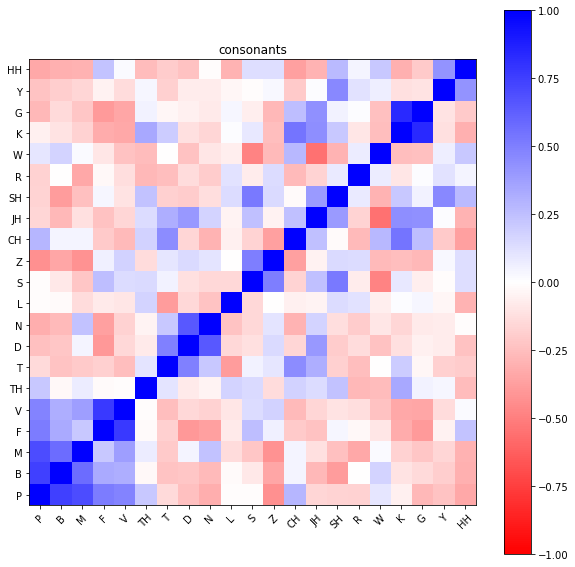

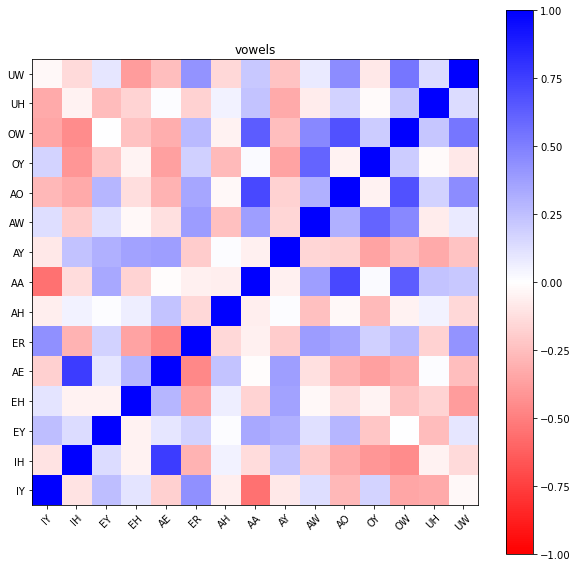